[Github](https://github.com/bacteria-archaea-traits/bacteria-archaea-traits)

export EGGNOG_DATA_DIR=/work/phenotyprediction/data/tools/eggnog-mapper/

https://learn.microsoft.com/en-us/azure/machine-learning/how-to-understand-automated-ml#roc-curve

Variance
- preciso ver um grupo ortólogo que é comum a todas as bactérias e outro que não é para comparar valores de variância
- https://blog.finxter.com/how-to-calculate-the-column-variance-of-a-dataframe-in-python-pandas/

SHAP
- https://www.yourdatateacher.com/2021/05/17/how-to-explain-neural-networks-using-shap/

Multi-Classification
- https://stackoverflow.com/questions/14225882/gridsearch-for-multilabel-onevsrestclassifier
- https://www.analyticsvidhya.com/blog/2021/09/onevsrest-classifier-for-predicting-multiple-tags-of-research-articles/
- https://stackoverflow.com/questions/16402236/how-to-use-onevsrestclassifier-with-svc-for-multilabel-problems

Multi-Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html
- https://machinelearningmastery.com/multi-output-regression-models-with-python/

Mostra como repetições interferem na expressão fenotípica
- https://www.nature.com/articles/317645a0

# condensed_traits_NCBI

* tax_id: NCBI taxonomy id at the lowest phylogenetic level identified by the species name
* species_tax_id: NCBI taxonomy id at species level
* isolation_source: Isolation sources reported for organism
* d1_lo: Lowest diameter
* d1_up: Largest diameter
* d2_lo: Smallest length
* d2_up: Largest length
* doubling_h: Minimum doubling time in hours
* gc_contenvt: GC content of organism (ratio)
* data_source: List of data sources from where the information for the specific organism was obtained
* ref_id: List of reference ids to original litterature (where available) from where the data was obtained

##### Multi-classe #####
* gram_stain: Gram reaction of organism ('positive' or 'negative')
* sporulation: If the organism sporulates (yes/no)
* motility: If the organism is motile and how
* cell_shape: Cell shape of organism

##### Multi-rótulo #####
* metabolism: Oxygen use (aerobic, anaerobic, etc.)
* range_tmp: Temperature range reported for the organism
* range_salinity: Salinity range reported for the organism
* pathways: List of metabolic pathways the organism can carry out (i.e. nitrate reduction, sulfur oxidation)
* carbon_substrates: List of carbon substrates the organism can utilise

##### Numérico #####
* optimum_tmp: Optimum temperature
* optimum_ph: Optimum pH
* growth_tmp: Reported growth temperature (not necessarily optimal)

### condensed_species_NCBI

|IDs | Nomenclatura | Genético | Características 1 | Características 2 |
|---|---|---|---|---|
| <b> | org_name | genome_size | gram_stain | optimum_ph |
| species_tax_id | species | gc_content | range_tmp | growth_tmp |
| ref_id | genus | coding_genes | metabolism | optimum_tmp |
| data_source | family | rRNA16S_genes | pathways | doubling_h |
| isolation_source | order | tRNA_genes | carbon_substrates | d1_lo
| isolation_source.count | class | <b> | sporulation | d1_up
| isolation_source.prop | phylum | <b> | motility | d2_lo
| <b> | superkingdom | <b> | range_salinity | d2_up
| <b> | <b> | <b> | cell_shape |

* species_tax_id é igual a accession    

* Genético e Características 2
    * possui atributo .count (indicates number of data points condensed for specific column value)
    * possui atributo .stdev
* Características 1
    * possui atributo .count 
    * possui atributo .prop (indicates the proportion of all condensed data points that agree with the chosen value)


- If no single term dominated, it was selected the less specific term (“aerobic” in favor of “obligate aerobic”; motility - “yes” in favor “flagella”)
- If all terms belong to the same category, the most specifc term was selected (“obligate aerobic” instead of “aerobic”)
- If all terms belong to the same category and all have the same level of specificity (“facultative aerobic” and “obligate aerobic”), the term is converted to its least specific form (“aerobic”)
- If terms belong to diferent categories (“aerobic” vs. “anaerobic”), no term was assigned (the value was lef blank)

Lista de fenótipos para janeiro 15
* Optimal growth pH
* Optimal growth temperature
* Ability to sporulate
* Salinity tolerance range
* Temperature tolerance range
* Motility
* Nitrogen fixation
* Nitrate reduction
* Fermentation
* Sulfate reduction

|Via metabólica|quantidade de dados|
|---|---|
|nitrogen_fixation| 225|
|nitrate_reduction| 1963|
|nitrite_reduction| 167|
|nitrite_oxidation| 10|
|nitrification| 133|
|denitrification| 122|
|fermentation| 582|
|sulfate_reduction| 205|
|sulfur_oxidation| 120|
|sulfur_reduction| 115|
|thiosulfate_reduction|131|

In [4]:
import pandas
phenotype = 'pathways'
madin = pandas.read_csv("./results/Madin_species.csv", sep=",")

madin = madin[madin.superkingdom != 'Archaea'] # retira arqueas
madin = madin.dropna(subset=[phenotype]).fillna(0) # seleciona linhas com fenótipo de interesse não-nulo
madin.rename(columns = {'species_tax_id':'taxid'}, inplace = True)
madin.rename(columns = {'class':'classes'}, inplace = True)

#madin['phenotypeUpperThreshold'] = madin[phenotype].add(madin[phenotype+'.stdev'])
#madin['phenotypeLowerThreshold'] = madin[phenotype].sub(madin[phenotype+'.stdev'])

madin.rename(columns = {phenotype:'phenotype'}, inplace = True)
#madin = madin[['taxid','data_source','genus','classes','order','family','species','phenotype']]
madin = madin[['genus','phenotype']]

madin = madin[madin.phenotype.str.contains('nitrate_reduction') == True]

print(madin)

                  genus                                          phenotype
1082      Paenibacillus                                  nitrate_reduction
1085   Aestuariibaculum                                  nitrate_reduction
1086         Algibacter                                  nitrate_reduction
1087         Algibacter                                  nitrate_reduction
1091          Algimonas                                  nitrate_reduction
...                 ...                                                ...
14519     Sulfuriferula  sulfur_oxidation_dark, nitrate_reduction, thio...
14541           Proteus  nitrite_reduction, nitrate_reduction_to_ammoni...
14620        Sulfurovum  sulfur_oxidation_dark, thiosulfate_oxidation_d...
14796  Desulfotomaculum  sulfite_reduction, nitrate_reduction, nitrite_...
14888          Bacillus                                  nitrate_reduction

[1963 rows x 2 columns]


In [3]:
import pandas 
phenotype = 'range_tmp'
madin = pandas.read_csv('results/'+phenotype+'/madin_'+phenotype+'.csv', sep=",")

for idx, row in madin.iterrows():
    if row.phenotype == 'extreme-halophilic' or row.phenotype == 'moderate-halophilic' or row.phenotype == 'halophilic':
        madin['phenotype'][idx] = 'yes'
        madin['phenotype2'][idx] = 'no'
    elif row.phenotype == 'non-halophilic':
        madin['phenotype'][idx] = 'no'
        
print(madin)

AttributeError: 'Series' object has no attribute 'phenotype'

## 1. gráficos e tabelas de distribuição taxonômica

In [177]:
import joblib
import pandas
phenotype = 'optimum_ph'
#metadata = joblib.load('results/'+phenotype+'/data/metadata.joblib')
metadata = joblib.load('results/'+phenotype+'/data/OGColumns.joblib')
#metadata = pandas.DataFrame(data=metadata[1:], columns=metadata[0])
print(len(metadata))

234480


In [15]:
count = metadata.family.value_counts().rename_axis('data').reset_index(name='counts')
print('Number of families: '+str(len(count)))
count = metadata.genus.value_counts().rename_axis('data').reset_index(name='counts')
print('Number of genus: '+str(len(count)))
count = metadata.species.value_counts().rename_axis('data').reset_index(name='counts')
print('Number of species: '+str(len(count)))

Number of families: 74
Number of genus: 114
Number of species: 172


Number of types: 85


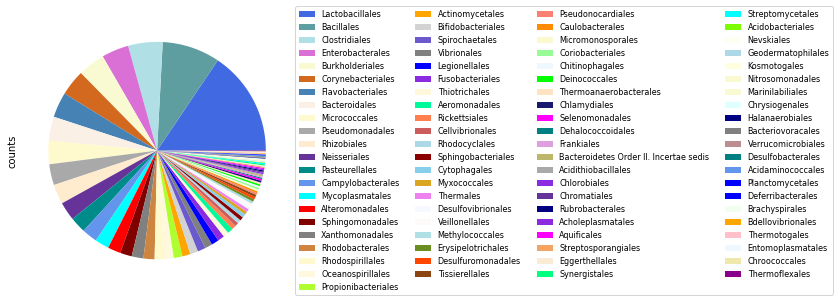

In [12]:
count = metadata.order.value_counts().rename_axis('data').reset_index(name='counts')

import matplotlib.colors as mcolors
import random
number_of_colors = len(count)
print('Number of types: '+str(number_of_colors))
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

countGraph = count.plot(y='counts', kind='pie', figsize=(5, 5), labels=count.data, labeldistance=None, colors=colors)
countGraph.legend(loc="right", bbox_to_anchor=(3.0,0.5), fontsize=8, ncol=4)

countGraph.figure.savefig(phenotype+'Order.png', bbox_inches="tight", dpi=800)

In [ ]:
import plotly.figure_factory as ff

count = ph.genus.value_counts().rename_axis('Genus').reset_index(name='Quantity')

part = int(len(count)/7)
df1 = count.iloc[:part]
df2 = count.iloc[part:2*part]
df3 = count.iloc[2*part:3*part]
df4 = count.iloc[3*part:4*part]
df5 = count.iloc[4*part:5*part]
df6 = count.iloc[5*part:6*part]
df7 = count.iloc[6*part:]

fig =  ff.create_table(df7)
fig.update_layout(autosize=False, height=600, width=500)
fig.show()

In [13]:
import numpy

a = list(range(10,60,2))

middle = 30
curve = middle/3
maxValue = 1

b = []

for c in a:
    c = (c-middle)/curve
    b.append(round( (maxValue / (1 + numpy.exp(-c))), 2 ))

for i in range(len(a)):
    print(str(a[i])+': '+str(b[i]))

10: 0.12
12: 0.14
14: 0.17
16: 0.2
18: 0.23
20: 0.27
22: 0.31
24: 0.35
26: 0.4
28: 0.45
30: 0.5
32: 0.55
34: 0.6
36: 0.65
38: 0.69
40: 0.73
42: 0.77
44: 0.8
46: 0.83
48: 0.86
50: 0.88
52: 0.9
54: 0.92
56: 0.93
58: 0.94


In [190]:
metadata = joblib.load('results/'+phenotype+'/data/data.joblib')
print(len(metadata))

821


In [200]:
pct = 0.25*std/mean
print(pct)

0.10612494746638712


In [7]:
import math

a = 0.843

print(type(math.ceil(a*100)/100))

<class 'float'>
